In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('Diabetes.csv')

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


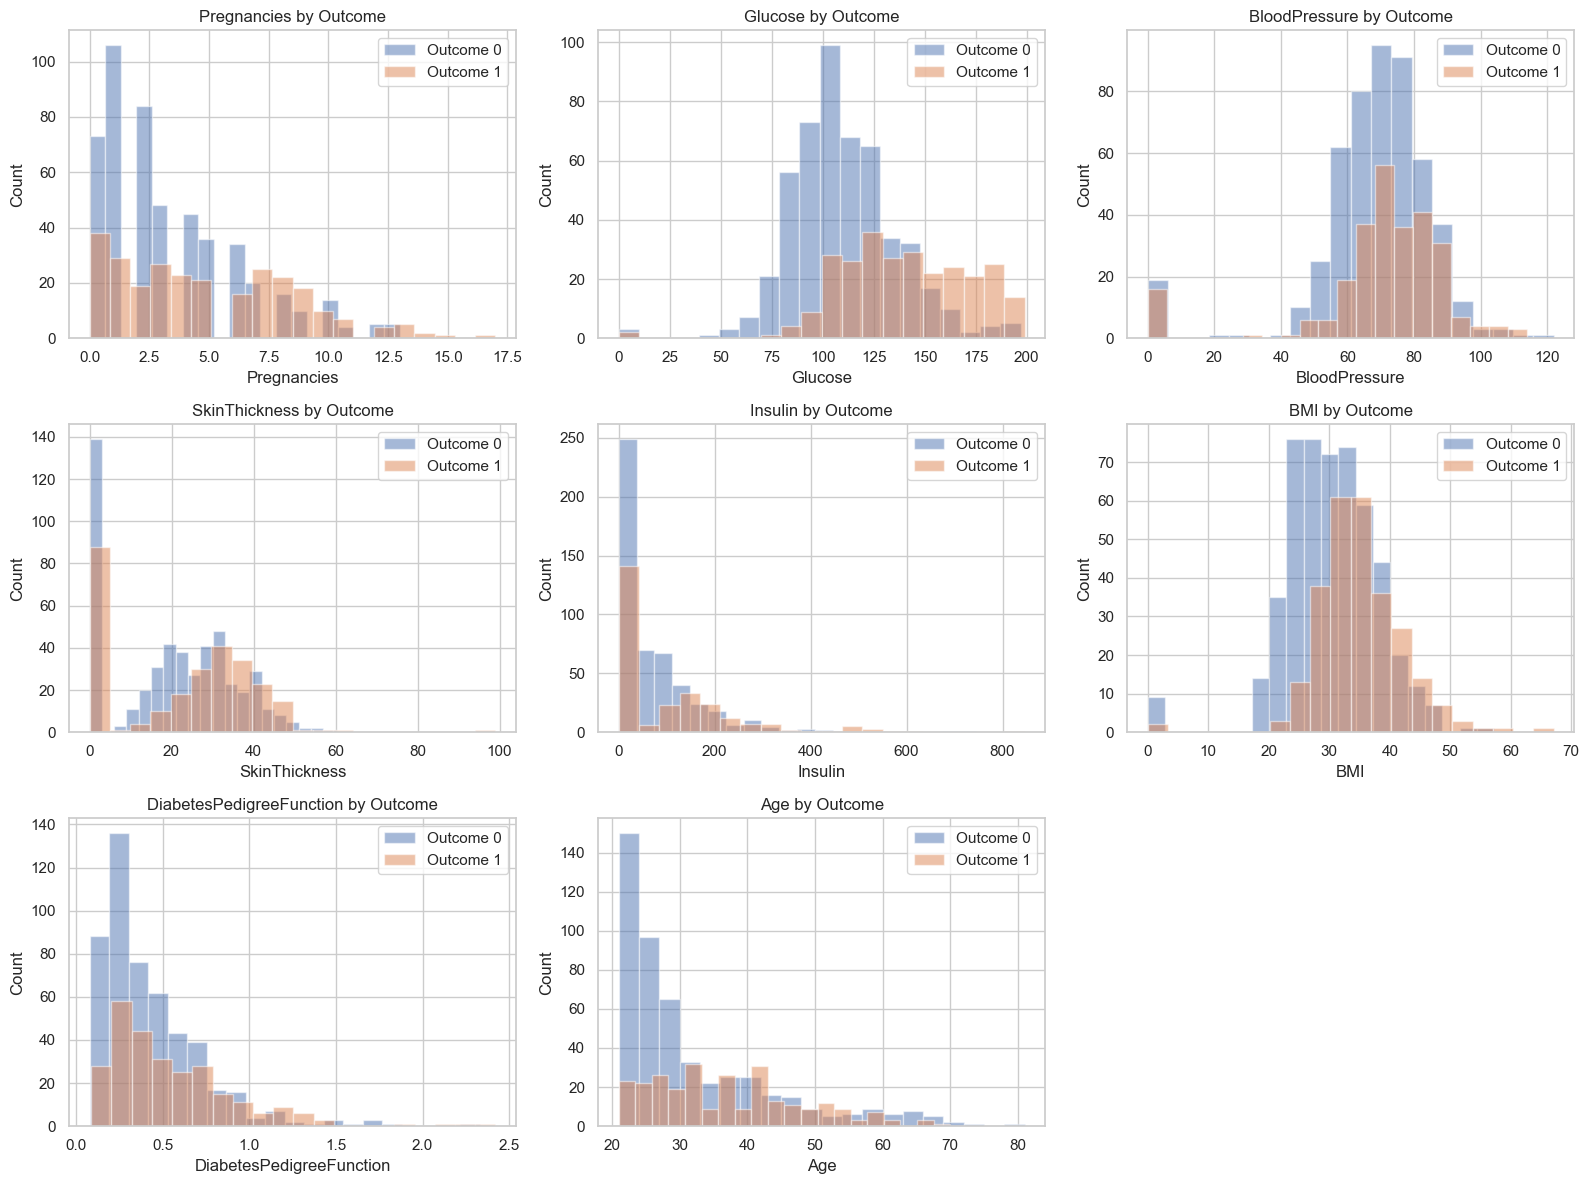

In [12]:
# plotting a histogram
sns.set(style="whitegrid")
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    for outcome in [0, 1]:
        subset = df[df['Outcome'] == outcome]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=f'Outcome {outcome}')
    plt.title(f'{feature} by Outcome')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = df['Outcome']  

In [16]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# creating and training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
# Evaluating the model
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Accuracy Score: 0.7532467532467533
